In [1]:
import cv2, collections
import numpy as np
import matplotlib.pyplot as plt

62.254314 1.0070972e-09 haha
255 0
(240, 320)
[255, 93, 232] [0, 45, 80]
93 232 howhow
92 232 howhow
7 104 howhow
93 233 howhow
94 232 howhow
92 233 howhow
7 105 howhow
40 203 howhow
11 69 howhow
6 120 howhow
41 203 howhow
35 243 howhow
9 72 howhow
11 67 howhow
40 205 howhow
6 100 howhow
35 244 howhow
6 104 howhow
35 242 howhow
94 233 howhow
40 206 howhow
35 245 howhow
11 68 howhow
93 231 howhow
12 69 howhow
10 67 howhow
36 248 howhow
7 102 howhow
40 204 howhow
7 103 howhow
92 231 howhow
38 205 howhow
39 205 howhow
35 246 howhow
8 104 howhow
6 121 howhow
6 101 howhow
35 248 howhow
35 247 howhow
43 228 howhow
36 247 howhow
111 222 howhow
17148 hahahahahahaha
43 229 howhow
112 222 howhow
37 205 howhow
36 245 howhow
42 229 howhow
40 207 howhow
36 242 howhow
91 232 howhow
38 208 howhow
11 70 howhow
38 207 howhow
36 207 howhow
6 105 howhow
6 102 howhow
41 242 howhow
41 202 howhow
36 206 howhow
36 205 howhow
44 228 howhow
11 66 howhow
86 228 howhow
35 207 howhow
9 71 howhow
87 228 howhow
12 

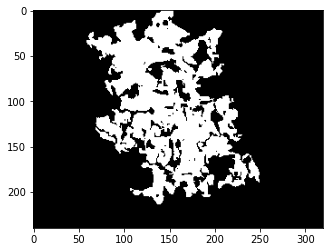

In [27]:
feature_params = dict(maxCorners = 300, qualityLevel = 0.2, minDistance = 2, blockSize = 7)
lk_params = dict(winSize = (15,15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
color = (0, 255, 0)
first_frame = cv2.imread("../images/images1/frame7.jpg")
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
prev = cv2.goodFeaturesToTrack(prev_gray, mask = None, **feature_params)
mask = np.zeros_like(first_frame)

T = 4.0          # threshold on the amount of movement recognized
K = 100          # the amount of seeds chosen for bfs

# recursive implementation of dfs
# takes position(i,j), visited matrix, motion vector matrix and threshold on vector magnitude
def bfs(i, j, vis, mag, t, region):
    util = [-1, 0, 1]
    if mag[i][j] < t:
        return 0
    q = collections.deque()
    area = 0
    vis[i][j] = True
    q.append([i,j])
    while len(q) > 0:
        curX, curY = q.popleft()
        region[curX][curY] = 1
        area += 1
        for a in range(3):
            for b in range(3):
                x = curX + util[a]
                y = curY + util[b]
                if x >= 0 and y >= 0 and x < mag.shape[0] and y < mag.shape[1] and vis[x][y] != True:
                    vis[x][y] = True  
                    if mag[x][y] >= t:
                        q.append([x, y])
    return area
    

r=0
for i in range(8,9):
    frame = cv2.imread("../images/images1/frame"+ str(i)+".jpg")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = gray.copy()
    prev = cv2.goodFeaturesToTrack(prev_gray, mask = None, **feature_params)

    # motion estimation
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 1, 5, 2, 5, 1.1, None)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Calculating feature value M
    dy, dx = np.gradient(gray)
    Ixx = dx**2
    Iyy = dy**2
    Ixy = dx*dy
    R_score = np.array(gray.copy(),dtype=np.float64)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            sum_Ix = 0
            sum_Iy = 0
            sum_Ixy = 0
            for k in range(-2,3):
                for l in range(-2,3):
                    if i+k >= 0 and j+l >= 0 and i+k < gray.shape[0] and j+l < gray.shape[1]:
                        sum_Ix += Ixx[i+k][j+l]
                        sum_Iy += Iyy[i+k][j+l]
                        sum_Ixy += Ixy[i+k][j+l]
                    else:
                        sum_Ix += 0
                        sum_Iy += 0
                        sum_Ixy += 0
            det = sum_Ix*sum_Iy - sum_Ixy*sum_Ixy
            trace = sum_Ixy + sum_Ixy
            r = det - 0.05*(trace**2)
            R_score[i][j] = r 
    min_val = np.min(R_score)
    R_score += (-1)*min_val
    max_val = np.max(R_score)
    R_score = (R_score/max_val)*255
    R_score = R_score.astype(int)
    
    listOfFeatures = []
    listTemp = []
    for x in range(frame.shape[0]):
        for y in range(frame.shape[1]):
            listTemp.append([R_score[x][y], x, y])
    listTemp.sort()
    listTemp.reverse()
    print(listTemp[0],listTemp[-1])
    for x in range(K):
        listOfFeatures.append(listTemp[x])

    region = np.zeros((frame.shape[0], frame.shape[1]), dtype=int)
    vis = [[False for x in range(frame.shape[1])] for y in range(frame.shape[0])]
    for point in listOfFeatures:
        area = bfs(point[1], point[2], vis, mag, T, region)
        # do something with the area if we want to
    
    plt.imshow(region, cmap='gray')
    plt.show()
    
    break
    good_old = prev[status == 1].astype(int)
    good_new = next[status == 1].astype(int)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d), color, 2)
        frame = cv2.circle(frame, (a, b), 3, color, -1)
    output = cv2.add(frame, mask)
    prev_gray = gray.copy()
    prev = good_new.reshape(-1, 1, 2)
    mask = np.zeros_like(frame)
    plt.imsave('images/output_trial1/frame'+ str(r)+'.jpg',output)
    r += 1